In [308]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Задание 1

In [49]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [38]:
feature_names = boston.feature_names

In [58]:
data = boston.data

In [61]:
target = boston.target

In [226]:
X = pd.DataFrame(data, columns=feature_names)

In [223]:
#X.info()

In [224]:
y = pd.DataFrame(target, columns=['price'])

In [225]:
#y.info()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [96]:
lr = LinearRegression()

In [101]:
lr.fit(X_train, y_train)

LinearRegression()

In [153]:
y_pred = lr.predict(X_test)

In [240]:
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()})

In [241]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]
check_test

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280
...,...,...,...
441,17.1,17.403672,0.303672
23,14.5,13.385941,-1.114059
225,50.0,39.983425,-10.016575
433,14.3,16.682863,2.382863


In [229]:
r2_score(y_test, y_pred)

0.711226005748496

In [243]:
y_pred_base = lr.predict(X_train)

In [232]:
r2_score(y_train, y_pred2)

0.7434997532004697

### Задание 2

In [202]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [203]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [205]:
rf_model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [233]:
y_pred_tree = rf_model.predict(X_train)

In [234]:
y_test_tree = rf_model.predict(X_test)

In [309]:
def evaluate_preds(true_values_train, 
                   pred_values_train, true_values_test, 
                   pred_values_test):
    print("Train:\t" + "R2 = " + str(round(r2_score(true_values_train, pred_values_train), 3)) 
          + "\tMAE = " + str(int(mean_absolute_error(true_values_train, pred_values_train))) + 
          "\n" + "Test:\t" + "R2 = " + str(round(r2_score(true_values_test, pred_values_test), 3)) + 
          "\tMAE = " + str(int(mean_absolute_error(true_values_test, pred_values_test))))

In [311]:
evaluate_preds(y_train, y_pred_tree, y_test, y_test_tree)

Train:	R2 = 0.978	MAE = 0
Test:	R2 = 0.875	MAE = 2


In [290]:
# Алгоритм Случайного Леса лучше чем Линейная Регрессия, т.к. вычисления R2 полученных предказаний у Леса больше приближаются к единице.

In [304]:
plt.rcParams["figure.figsize"] = 8, 5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(["valid", "train"])
plt.xlim(2, 19)

AttributeError: module 'matplotlib' has no attribute 'plot'

### Задание 3

In [266]:
#help(RandomForestRegressor)

In [275]:
feature_importances = pd.DataFrame(zip(*[X_train.columns], rf_model.feature_importances_), 
                                   columns=["feature_name", "importance"])

feature_importances.sort_values(by="importance", ascending=False, inplace=True)

In [277]:
feature_importances

,feature_name,importance
12,LSTAT,0.415847
5,RM,0.402682
7,DIS,0.063973
0,CRIM,0.031676
10,PTRATIO,0.018081
6,AGE,0.014299
4,NOX,0.014269
11,B,0.012451
9,TAX,0.011525
2,INDUS,0.007138


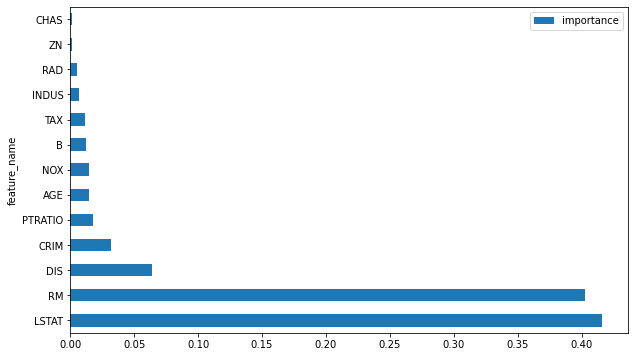

In [287]:
feature_importances.nlargest(20, columns="importance").plot(x="feature_name", y="importance", kind="barh", 
                                                           figsize=(10, 6));